In [1]:
!pip install opendatasets -q

In [2]:
import opendatasets as op
op.download('https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mani510
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset


100%|██████████| 211k/211k [00:00<00:00, 319MB/s]

In [3]:
import pandas as pd
import numpy as np

In [4]:
sms_df = pd.read_csv("/content/sms-spam-collection-dataset/spam.csv", encoding="ISO-8859-1")

In [5]:
sms_df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
487,ham,Dear reached railway. What happen to you,NaN,NaN,NaN
5168,ham,"IÛ÷ve got some salt, you can rub it in my ope...",NaN,NaN,NaN
1491,spam,Your account has been credited with 500 FREE T...,NaN,NaN,NaN
957,ham,Welp apparently he retired,NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [6]:
sms_df.shape

(5572, 5)

## Data Cleaning

In [7]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
sms_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [9]:
sms_df.rename(columns={
    "v1":"target",
    "v2":"text"
}, inplace=True)

In [10]:
sms_df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
sms_df.isnull().sum()

,0
target,0
text,0


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
sms_df['target']=encoder.fit_transform(sms_df['target'])

In [14]:
sms_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
sms_df.duplicated().sum()

np.int64(403)

In [16]:
sms_df=sms_df.drop_duplicates()

In [17]:
sms_df.duplicated().sum()

np.int64(0)

In [18]:
sms_df.shape

(5169, 2)

## EDA

In [19]:
sms_df['target'].value_counts()

,count
target,
0,4516
1,653


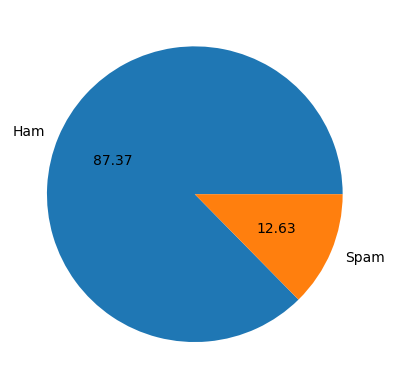

In [20]:
import matplotlib.pyplot as plt
plt.pie(sms_df['target'].value_counts(),labels=["Ham","Spam"],autopct="%.2f")
plt.show()

Data is Highly Imbalanced

In [21]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [22]:
sms_df['characters_count']=sms_df['text'].apply(len)

In [23]:
sms_df['words_count']=sms_df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
sms_df['sentence_count']=sms_df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [25]:
sms_df.head()

,target,text,characters_count,words_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
sms_df[sms_df['target']==0][['characters_count','words_count','sentence_count']].describe()

,characters_count,words_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
sms_df[sms_df['target']==1][['characters_count','words_count','sentence_count']].describe()

,characters_count,words_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [28]:
import seaborn as sns

<Axes: xlabel='characters_count', ylabel='Count'>

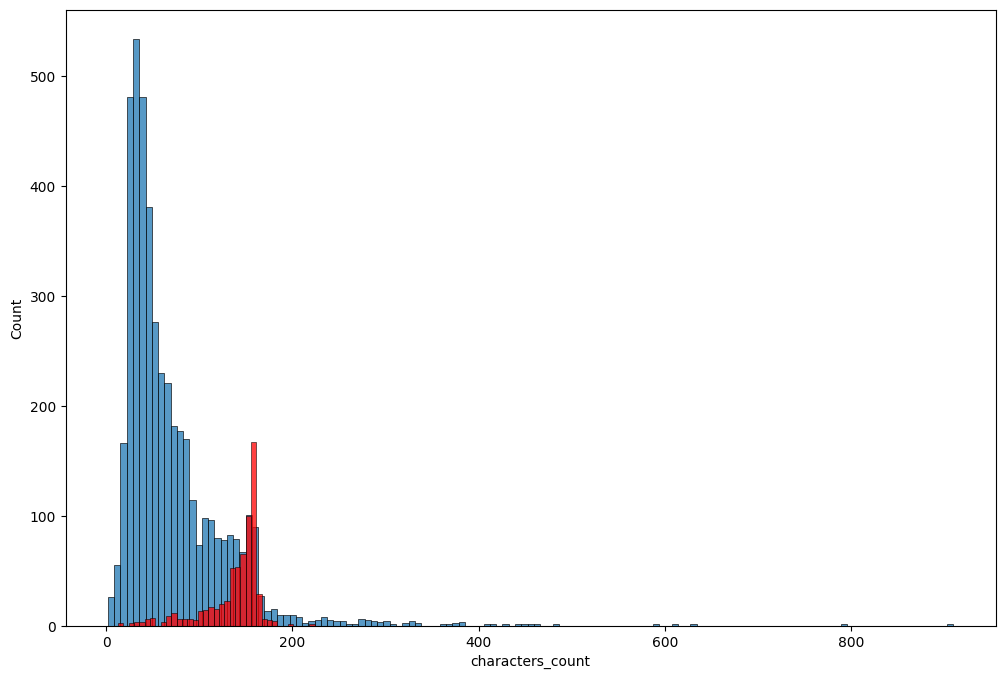

In [29]:
plt.figure(figsize=(12,8))
sns.histplot(sms_df[sms_df['target']==0]['characters_count'])
sns.histplot(sms_df[sms_df['target']==1]['characters_count'],color="red")

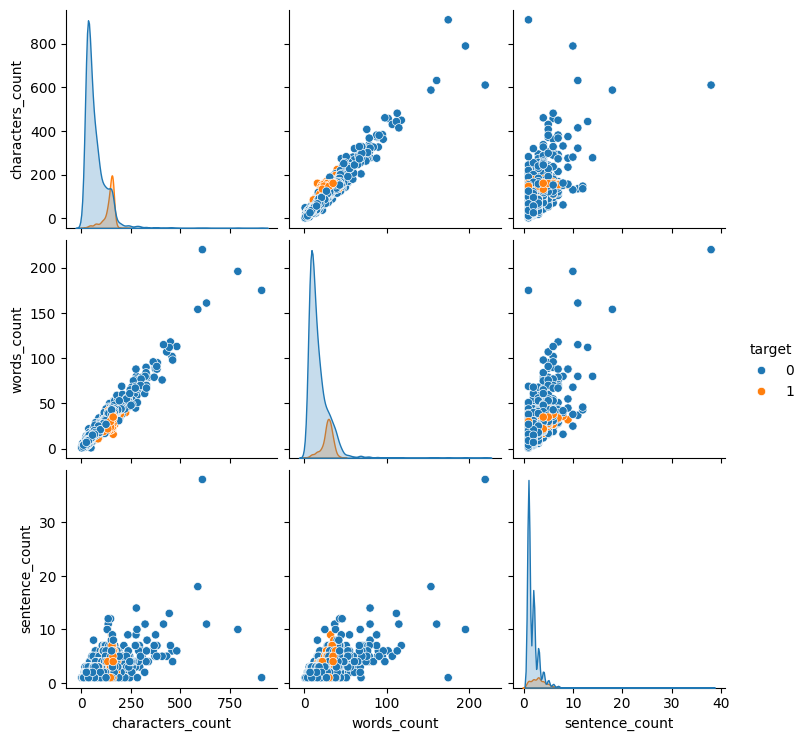

In [30]:
sns.pairplot(sms_df,hue="target")

<Axes: >

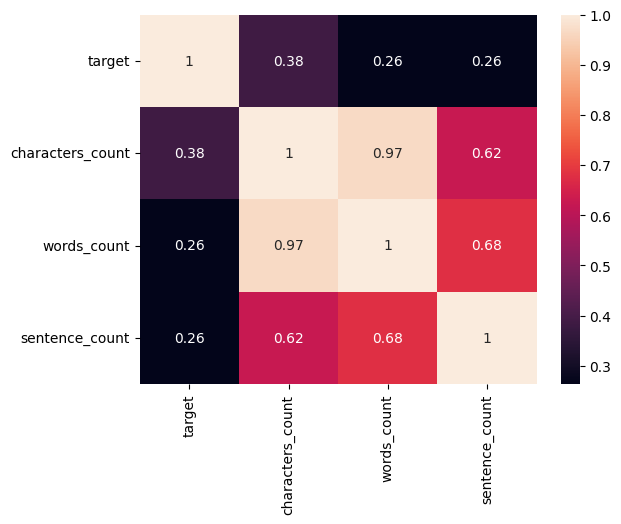

In [31]:
sns.heatmap(sms_df[['target','characters_count',"words_count","sentence_count"]].corr(),annot=True)

## Text Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing Stop words and Punctuation
- Stemming

In [32]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from string import punctuation
from nltk.stem.porter import  PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
def tranform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [34]:
sms_df['transformed_text']=sms_df['text'].apply(tranform_text)

### Spam Corpus Identification

In [35]:
spam_corpus=[]
text_list=list(sms_df[sms_df["target"]==1]['transformed_text'])
for msg in text_list:
  for word in msg.split():
    spam_corpus.append(word)

In [36]:
len(spam_corpus)

9939

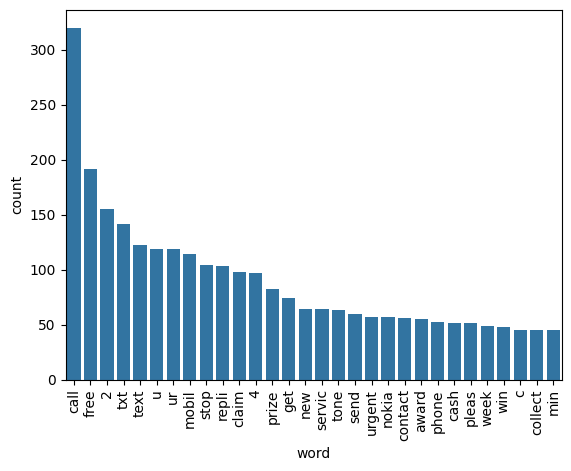

In [37]:
from collections import Counter
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word','count'])
sns.barplot(x="word",y="count",data=common_words)
plt.xticks(rotation="vertical")
plt.show()

In [38]:
sms_df[sms_df['target']==1]['transformed_text'].str.cat(sep=" ")

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18 freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq thank subscript rington uk mobil charg pleas confirm repli ye repli charg 07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow sm ac sptv new jersey devil detroit red w

In [39]:
from wordcloud import WordCloud
wc=WordCloud(background_color="white")
generated_wc=wc.generate(sms_df[sms_df['target']==1]['transformed_text'].str.cat(sep=" "))

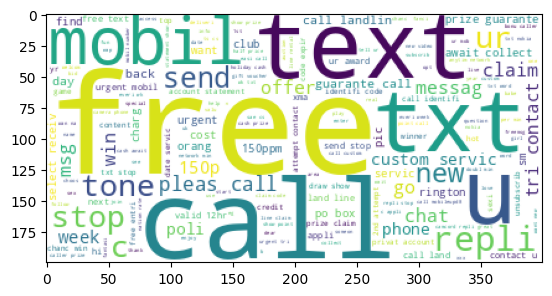

In [40]:
plt.imshow(generated_wc)

### Ham Corpus Identification

In [41]:
list(sms_df[sms_df['target']==0]['transformed_text'])[0].split()

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat']

In [42]:
ham_corpus=[]
for msg in list(sms_df[sms_df['target']==0]['transformed_text']):
  for word in msg.split():
    ham_corpus.append(word)

In [43]:
len(ham_corpus)

35404

In [44]:
from collections import Counter
ham_df=pd.DataFrame(Counter(ham_corpus).most_common(30),columns=["word","count"])

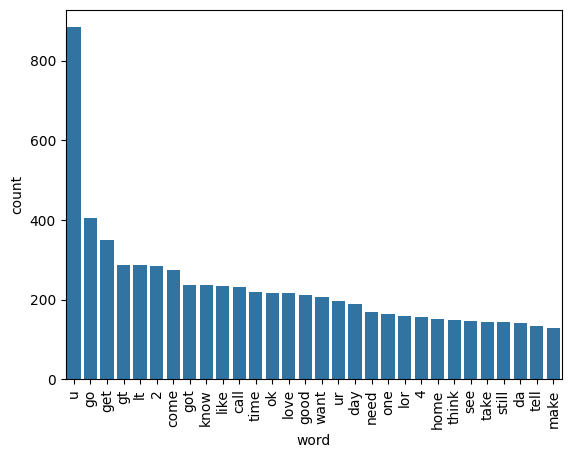

In [45]:
sns.barplot(ham_df,x='word',y='count')
plt.xticks(rotation="vertical")
plt.show()

In [46]:
sms_df[sms_df['target']==0]['transformed_text'].str.cat(sep=" ")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat ok lar joke wif u oni u dun say earli hor u c alreadi say nah think goe usf live around though even brother like speak treat like aid patent per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun gon na home soon want talk stuff anymor tonight k cri enough today search right word thank breather promis wont take help grant fulfil promis wonder bless time date sunday oh k watch eh u rememb 2 spell name ye v naughti make v wet fine thatåõ way u feel thatåõ way gota b serious spell name go tri 2 month ha ha joke pay first lar da stock comin aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi ffffffffff alright way meet sooner forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol lol alway convinc catch bu fri egg make tea eat mom left dinner feel love back amp pack car let know room ahhh work vagu rememb feel like lol wait sti

In [47]:
from wordcloud import WordCloud
wc=WordCloud(background_color="white")
ham_wc=wc.generate(sms_df[sms_df['target']==0]['transformed_text'].str.cat(sep=" "))

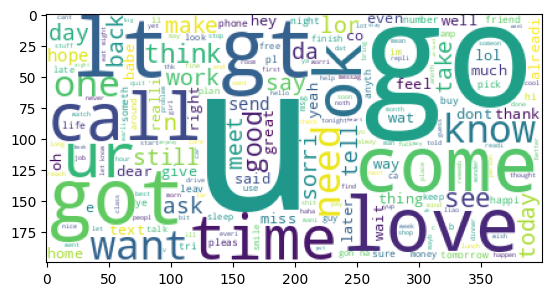

In [48]:
plt.imshow(ham_wc)

# Vectorization

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tdidf=TfidfVectorizer(max_features=3000)

In [55]:
X=tdidf.fit_transform(sms_df['transformed_text']).toarray()

In [57]:
y=sms_df['target']

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

# Model Development

In [87]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.svm import SVC

In [88]:
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
bnb_pred=bnb.predict(X_test)
print(accuracy_score(y_pred=bnb_pred,y_true=y_test))
print(confusion_matrix(y_pred=bnb_pred,y_true=y_test))
print(precision_score(y_pred=bnb_pred,y_true=y_test))

0.9767981438515081
[[1143    6]
 [  24  120]]
0.9523809523809523


In [89]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred=gnb.predict(X_test)
print(accuracy_score(y_pred=gnb_pred,y_true=y_test))
print(confusion_matrix(y_pred=gnb_pred,y_true=y_test))
print(precision_score(y_pred=gnb_pred,y_true=y_test))

0.851508120649652
[[977 172]
 [ 20 124]]
0.4189189189189189


In [90]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
mnb_pred=mnb.predict(X_test)
print(accuracy_score(y_pred=mnb_pred,y_true=y_test))
print(confusion_matrix(y_pred=mnb_pred,y_true=y_test))
print(precision_score(y_pred=mnb_pred,y_true=y_test))

0.9760247486465584
[[1149    0]
 [  31  113]]
1.0


In [91]:
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
etc.fit(X_train,y_train)
etc_pred=etc.predict(X_test)
print(accuracy_score(y_pred=etc_pred,y_true=y_test))
print(confusion_matrix(y_pred=etc_pred,y_true=y_test))
print(precision_score(y_pred=etc_pred,y_true=y_test))

0.9783449342614076
[[1146    3]
 [  25  119]]
0.9754098360655737


In [92]:
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
rfc.fit(X_train,y_train)
rfc_pred=etc.predict(X_test)
print(accuracy_score(y_pred=rfc_pred,y_true=y_test))
print(confusion_matrix(y_pred=rfc_pred,y_true=y_test))
print(precision_score(y_pred=rfc_pred,y_true=y_test))

0.9783449342614076
[[1146    3]
 [  25  119]]
0.9754098360655737


In [93]:
svc=SVC(kernel="sigmoid")
svc.fit(X_train,y_train)
svc_pred=etc.predict(X_test)
print(accuracy_score(y_pred=svc_pred,y_true=y_test))
print(confusion_matrix(y_pred=svc_pred,y_true=y_test))
print(precision_score(y_pred=svc_pred,y_true=y_test))

0.9783449342614076
[[1146    3]
 [  25  119]]
0.9754098360655737


In [86]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[("MNB",mnb),("ETC",etc),("RFC",rfc),("SVC",svc)],voting="soft")
vc.fit(X_train,y_train)
vc_pred=etc.predict(X_test)
print(accuracy_score(y_pred=vc_pred,y_true=y_test))
print(confusion_matrix(y_pred=vc_pred,y_true=y_test))
print(precision_score(y_pred=vc_pred,y_true=y_test))

0.9783449342614076
[[1146    3]
 [  25  119]]
0.9754098360655737


In [94]:
import pickle
pickle.dump(mnb,open("model.pkl",'wb'))

In [96]:
pickle.dump(tdidf,open("ventorizer.pkl",'wb'))